In [1]:
import numpy as np
import random as rm

In [2]:
# The statespace
states = ["Higher Highs","Higher Lows","Lower Highs","Lower Lows"]

# Possible sequences of events
transitionName = [["HHHH","HHHL","HHLH","HHLL"],["HLHH","HLHL","HLLH","HLLL"],["LHHH","LHHL","LHLH","LHLL"],["LLHH","LLHL","LLLH","LLLL"]]

# Probabilities matrix (transition matrix)
#transitionMatrix = [[0.4,0.6,0.0,0.0],[0.4286,0.2857,0.0,0.2857],[0.0,1.0,0.0,0.0],[0.5,0.5,0.0,0.0]]
transitionMatrix=[[0.941,0.059,0,0],[0.02,0.946,0.034,0],[0,0.2,0.6,0.2],[0,0,0.5,0.5]]

In [3]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])+sum(transitionMatrix[3]) != 4:
    print("Something went wrong")


In [4]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Lower Highs"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Higher Highs":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "HHHH":
                prob = prob * 0.941
                activityList.append("Higher Highs")
                pass
            elif change == "HHHL":
                prob = prob * 0.059
                activityToday = "Higher Lows"
                activityList.append("Higher Lows")
            elif change== "HHLH":
                prob = prob * 0.0
                activityToday = "Lower Highs"
                activityList.append("Lower Highs")
            else:
                prob = prob * 0.0
                activityToday = "Lower Lows"
                activityList.append("Lower Lows")
        elif activityToday == "Higher Lows":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "HLHH":
                prob = prob * 0.02
                activityToday = "Higher Highs"
                activityList.append("Higher Highs")
                pass
            elif change == "HLHL":
                prob = prob * 0.946
                activityList.append("Higher Lows")
            elif change== "HLLH":
                prob = prob * 0.034
                activityToday = "Lower Highs"
                activityList.append("Lower Highs")
            else:
                prob = prob * 0.0
                activityToday = "Lower Lows"
                activityList.append("Lower Lows")
        elif activityToday == "Lower Highs":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "LHHH":
                prob = prob * 0.0
                activityToday = "Higher Highs"
                activityList.append("Higher Highs")
                pass
            elif change == "LHHL":
                prob = prob * 0.2
                activityToday = "Higher Lows"
                activityList.append("Higher Lows")
            elif change== "LHLH":
                prob = prob * 0.6
                activityList.append("Lower Highs")
            else:
                prob = prob * 0.2
                activityToday = "Lower Lows"
                activityList.append("Lower Lows")
        elif activityToday == "Lower Lows":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "LLHH":
                prob = prob * 0.0
                activityToday = "Higher Highs"
                activityList.append("Higher Highs")
                pass
            elif change == "LLHL":
                prob = prob * 0.0
                activityToday = "Higher Lows"
                activityList.append("Higher Lows")
            elif change== "LLLH":
                prob = prob * 0.5
                activityToday = "Lower Highs"
                activityList.append("Lower Highs")
            else:
                prob = prob * 0.5
                activityList.append("Lower Lows")
        print(prob)
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 1 day
activity_forecast(1)

Start state: Lower Highs
0.2
Possible states: ['Lower Highs', 'Higher Lows']
End state after 1 days: Higher Lows
Probability of the possible sequence of states: 0.2


In [5]:
activity_forecast(2)

Start state: Lower Highs
0.6
0.12
Possible states: ['Lower Highs', 'Lower Highs', 'Higher Lows']
End state after 2 days: Higher Lows
Probability of the possible sequence of states: 0.12


In [6]:
hh_val,hl_val,lh_val,ll_val = [],[],[],[]
# initial state
init_state = np.array([0, 0, 1,0])
# transition matrix
i=1
a = np.array([[0.941,0.059,0,0],[0.02,0.946,0.034,0],[0,0.2,0.6,0.2],[0,0,0.5,0.5]])
for x in range(1,4):
    hh_val.append(init_state[0])
    hl_val.append(init_state[1])
    lh_val.append(init_state[2])
    ll_val.append(init_state[3])
    b = init_state
    init_state = b.dot(a)
    print("Day",i)
    print("x(",i,")",init_state)
    print("Probability of starting at state 'Lower Highs' and ending at state 'Higher High' for day",i," =",int(init_state[0]*100),"%")
    print("Probability of starting at state 'Lower Highs' and ending at state 'Higher Low' for day",i," =",int(init_state[1]*100),"%")
    print("Probability of starting at state 'Lower Highs' and ending at state 'Lower High' for day",i," =",int(init_state[2]*100),"%")
    print("Probability of starting at state 'Lower Highs' and ending at state 'Lower Low' for day",i," =",int(init_state[3]*100),"%")
    print("\n")
    i=i+1
    

Day 1
x( 1 ) [0.  0.2 0.6 0.2]
Probability of starting at state 'Lower Highs' and ending at state 'Higher High' for day 1  = 0 %
Probability of starting at state 'Lower Highs' and ending at state 'Higher Low' for day 1  = 20 %
Probability of starting at state 'Lower Highs' and ending at state 'Lower High' for day 1  = 60 %
Probability of starting at state 'Lower Highs' and ending at state 'Lower Low' for day 1  = 20 %


Day 2
x( 2 ) [0.004  0.3092 0.4668 0.22  ]
Probability of starting at state 'Lower Highs' and ending at state 'Higher High' for day 2  = 0 %
Probability of starting at state 'Lower Highs' and ending at state 'Higher Low' for day 2  = 30 %
Probability of starting at state 'Lower Highs' and ending at state 'Lower High' for day 2  = 46 %
Probability of starting at state 'Lower Highs' and ending at state 'Lower Low' for day 2  = 22 %


Day 3
x( 3 ) [0.009948  0.3860992 0.4005928 0.20336  ]
Probability of starting at state 'Lower Highs' and ending at state 'Higher High' for 

x( 0 ) [0 0 1 0]
x( 1 ) [0.  0.2 0.6 0.2]
x( 2 ) [0.004  0.3092 0.4668 0.22  ]
x( 3 ) [0.009948  0.3860992 0.4005928 0.20336  ]
x( 4 ) [0.01708305 0.44595534 0.35516305 0.18179856]
x( 5 ) [0.02499426 0.49391426 0.31915959 0.16193189]
x( 6 ) [0.03339788 0.53254947 0.28925479 0.14479786]
x( 7 ) [0.0420784  0.56361323 0.26405849 0.13024989]
x( 8 ) [0.05086804 0.58847244 0.24272289 0.11793664]
x( 9 ) [0.05963627 0.60824072 0.22461012 0.1075129 ]
x( 10 ) [0.06828254 0.62383628 0.2092027  0.09867847]
x( 11 ) [0.0767306  0.63601833 0.19607129 0.09117978]
x( 12 ) [0.08492386 0.64541471 0.18485729 0.08480415]
x( 13 ) [0.09282165 0.65254428 0.17526054 0.07937353]
x( 14 ) [0.10039606 0.65783547 0.1670296  0.07473887]
x( 15 ) [0.1076294  0.66164164 0.1599536  0.07077536]
x( 16 ) [0.1145121  0.66425385 0.15385566 0.0673784 ]
x( 17 ) [0.12104096 0.66591149 0.14858722 0.06446033]
x( 18 ) [0.12721777 0.66681113 0.14402349 0.06194761]
x( 19 ) [0.13304815 0.66711387 0.14005948 0.0597785 ]
x( 20 ) [0.138

Text(0, 0.5, 'Probablity')

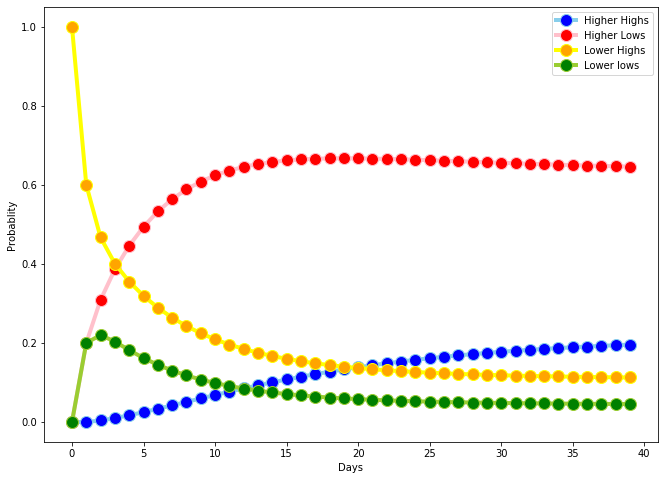

In [7]:
import matplotlib.pyplot as plt
hh_val,hl_val,lh_val,ll_val = [],[],[],[]
# initial state
init_state = np.array([0, 0, 1,0])
# transition matrix
i=0
a = np.array([[0.941,0.059,0,0],[0.02,0.946,0.034,0],[0,0.2,0.6,0.2],[0,0,0.5,0.5]])
for x in range(40):
    print("x(",i,")",init_state)
    hh_val.append(init_state[0])
    hl_val.append(init_state[1])
    lh_val.append(init_state[2])
    ll_val.append(init_state[3])
    b = init_state
    init_state = b.dot(a)
    i=i+1
    
# plotting
#print(hh_val);
plt.figure(figsize=(11,8))
plt.plot( [x for x in range(40)], hh_val, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='Higher Highs')
plt.plot( [x for x in range(40)], hl_val, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4,label='Higher Lows')
plt.plot( [x for x in range(40)], lh_val, marker='o', markerfacecolor='orange', markersize=12, color='yellow', linewidth=4,label='Lower Highs')
plt.plot( [x for x in range(40)], ll_val, marker='o', markerfacecolor='green', markersize=12, color='yellowgreen', linewidth=4,label='Lower lows')
plt.legend(loc='best')
plt.xlabel('Days')
plt.ylabel('Probablity')